In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [180]:
# Set the working directory
os.chdir('/Users/joaquinmartinezsosa/Desktop/University/BAM/Customer Analytics/Unilever')

# Confirm the working directory
print(os.getcwd())


/Users/joaquinmartinezsosa/Desktop/University/BAM/Customer Analytics/Unilever


In [181]:

# Load Sales data
amazon_reviews = pd.read_csv(os.path.join(os.getcwd(), 'Amazon_categories_final_clean.csv'))


## General

### How many ratings per product


In [182]:
number_ratings_per_product = amazon_reviews.groupby('product_name')['Rating'].count().reset_index()

In [183]:
number_ratings_per_product.head()

,product_name,Rating
0,Hellmann's BBQ Sauce intensive und würzige Gr...,2
1,Hellmann's Cheese Style Sauce leckere Grillsa...,4
2,Hellmann's Cheese Style Sauce leckere Grillsa...,23
3,Hellmann's Ketjap,1
4,Hellmann's REAL Salat Mayo leckere Salat Mayo...,74


In [184]:
number_ratings_per_product.describe()

,Rating
count,380.000000
mean,35.021053
std,62.651186
min,1.000000
25%,2.000000
50%,8.500000
75%,43.000000
max,621.000000


More than half of the products have less than 9 reviews


In [185]:
# Remove all products that have less than 9 reviews (below median)
q2 = number_ratings_per_product['Rating'].quantile(0.5)
subset_first_two_quartiles = number_ratings_per_product[number_ratings_per_product['Rating'] >= q2]


amazon_reviews_more_than_8_reviews = amazon_reviews[amazon_reviews['product_name'].isin(subset_first_two_quartiles['product_name'])]

In [186]:
print(f'Length of Amazon Reviews: {len(amazon_reviews)} \
      \nLength of Amazon Reviews with > 8 reviews: {len(amazon_reviews_more_than_8_reviews)}')

Length of Amazon Reviews: 13308       
Length of Amazon Reviews with > 8 reviews: 12757


In [187]:
# Testing if it worked
#       post_number_ratings_per_product = amazon_reviews_more_than_8_reviews.groupby('product_name')['Rating'].count().reset_index()
#       post_number_ratings_per_product.describe()

## Ratings Analysis

### Avg Rating per Product

In [188]:
avg_rating_per_product = amazon_reviews.groupby('product_name')['Rating'].mean().reset_index()
avg_rating_per_product['product_name'] = amazon_reviews['product_name'].astype('category')
avg_rating_per_product.head()


,product_name,Rating
0,Knorr Sauce Béarnaise 250ml 250ml,3.500000
1,Knorr Sauce Béarnaise 250ml 250ml,3.000000
2,Knorr Sauce Béarnaise 250ml 250ml,3.260870
3,Knorr Sauce Béarnaise 250ml 250ml,5.000000
4,Knorr Sauce Béarnaise 250ml 250ml,4.202703


/var/folders/bs/7jrmr7lx3qgdc1wgj87n85wc0000gn/T/ipykernel_67034/2589296104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='product_name', y='Rating', data=avg_rating_per_product_sorted, palette="viridis",


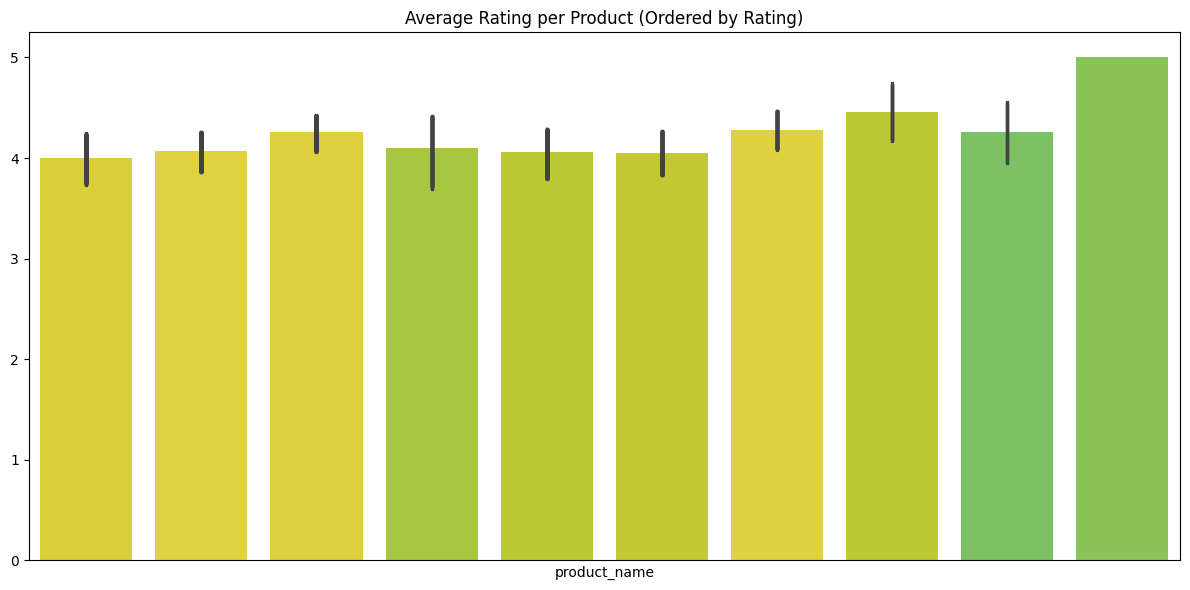

In [189]:
# Assuming avg_rating_per_product is your DataFrame
# Sort the DataFrame by 'Rating' in ascending order
avg_rating_per_product_sorted = avg_rating_per_product.sort_values(by='Rating')

# Create the bar plot
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='product_name', y='Rating', data=avg_rating_per_product_sorted, palette="viridis",
                   order=avg_rating_per_product_sorted['product_name'])

# Remove x-axis labels
plt.xticks([])

# Remove y-axis label
plot.set(ylabel=None)

# Add title
plt.title('Average Rating per Product (Ordered by Rating)')

# Show plot
plt.tight_layout()
plt.show()

### Proportion of 1 and 5 Star Ratings per Product

In [191]:
# Find percent of ratings that are 1s and percent that are 5s
def finding_proportion_of_ones(group):
    count_ratings = len(group)
    count_ones = len(group[group['Rating'] == 1.0])
    
    proportion_ones = count_ones / count_ratings
    return proportion_ones

def finding_proportion_of_fives(group):
    count_ratings = len(group)
    count_fives = len(group[group['Rating'] == 5.0])
    
    proportion_fives = count_fives / count_ratings
    return proportion_fives


In [195]:
proportional_ratings_per_product_ones = amazon_reviews_more_than_8_reviews.groupby('product_name').apply(finding_proportion_of_ones).reset_index()
proportional_ratings_per_product_fives = amazon_reviews_more_than_8_reviews.groupby('product_name').apply(finding_proportion_of_fives).reset_index()
proportional_ratings_per_product = pd.merge(proportional_ratings_per_product_ones,proportional_ratings_per_product_fives, on ='product_name', how = 'inner')

In [196]:
proportional_ratings_per_product.describe()

,0_x,0_y
count,190.000000,190.000000
mean,0.073218,0.550113
std,0.064939,0.159490
min,0.000000,0.147059
25%,0.030090,0.440169
50%,0.058824,0.565217
75%,0.096957,0.665966
max,0.333333,0.950000


In [202]:
proportional_ratings_per_product.iloc[3,]['product_name']

"Hellmann's  Sauce mit Knoblauchnote ideal zum Dippen und Verfeinern beim Barbecue vegetarisch 8x 250 ml"

In [205]:
proportional_ratings_per_product.head()

,product_name,0_x,0_y
0,Hellmann's Cheese Style Sauce leckere Grillsa...,0.260870,0.260870
1,Hellmann's REAL Salat Mayo leckere Salat Mayo...,0.094595,0.648649
2,Hellmann's Real Mayonnaise ideal zum Verfeine...,0.068376,0.675214
3,Hellmann's Sauce mit Knoblauchnote ideal zum ...,0.181818,0.363636
4,Hellmann's Tomato Ketchup leckere Grillsauce ...,0.000000,0.680000
